## Introduction

The goal of this analysis is to explore the Superstore dataset to identify sales and profit patterns. Also, find insights to help improve business decisions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect Data

### Dataset
The dataset used is the *Superstore Sales* dataset, containing over 9,000 orders with details such as sales, profit, discount, region, and category.  
Each record represents an individual transaction between 2014 and 2017.

In [2]:
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='muted')

In [3]:
df = pd.read_csv("../data/raw/Superstore_Sales.csv", encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()
df.describe(include='all').T.head(15)
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Row ID,9994.0,NaN,NaN,NaN,4997.5,2885.163629,1.0,2499.25,4997.5,7495.75,9994.0
Order ID,9994,5009,CA-2017-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9994,1237,9/5/2016,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Date,9994,1334,12/16/2015,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Mode,9994,4,Standard Class,5968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,9994,793,WB-21850,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,9994,793,William Brown,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9994,3,Consumer,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9994,1,United States,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,531,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Objective

- Understand sales and profit performance across different regions, segments, and product categories.
- Identify key trends, correlations, and outliers that impact profitability.
- Provide at least 3 actionable recommendations to improve overall sales and reduce losses.

## 🧼 Data Cleaning

- Check for missing values.
- Identify and remove duplicate rows.
- Correct data types if necessary.

In [5]:
# Checking for missint values
df.isnull().sum().sort_values(ascending=False)

Row ID           0
Postal Code      0
Discount         0
Quantity         0
Sales            0
Product Name     0
Sub-Category     0
Category         0
Product ID       0
Region           0
State            0
Order ID         0
City             0
Country          0
Segment          0
Customer Name    0
Customer ID      0
Ship Mode        0
Ship Date        0
Order Date       0
Profit           0
dtype: int64

In [6]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [7]:
# Checking data types and fix
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
print(f"df shape: {df.shape}")

df shape: (9994, 21)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [11]:
# Creation of new variables for analysis

# Extracting year and month
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month Name'] = df['Order Date'].dt.strftime('%B')

# Profit margin %
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Total price after discount
df['Discounted Price'] = df['Sales'] * (1 - df['Discount'])

# Days between order and shipment
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [12]:
df[['Order Date', 'Order Year', 'Order Month Name', 'Profit Margin', 'Discounted Price', 'Shipping Days']].head()

,Order Date,Order Year,Order Month Name,Profit Margin,Discounted Price,Shipping Days
0,2016-11-08,2016,November,16.00,261.960000,3
1,2016-11-08,2016,November,30.00,731.940000,3
2,2016-06-12,2016,June,47.00,14.620000,4
3,2015-10-11,2015,October,-40.00,526.667625,7
4,2015-10-11,2015,October,11.25,17.894400,7


In [13]:
# Columns name standardization

print(df.columns.tolist())

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

print("Standarized: \n", df.columns.tolist())

['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month', 'Order Month Name', 'Profit Margin', 'Discounted Price', 'Shipping Days']
Standarized: 
 ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'order_year', 'order_month', 'order_month_name', 'profit_margin', 'discounted_price', 'shipping_days']


In [14]:
# Saving cleaned data

df.to_csv("../data/processed/superstore_cleaned.csv")

## 📈 KPI Calculation

We will be defining the principal KPI's and building the proper visualizations with their analysis

In [15]:
kpis = {
    'Total Sales ($)': df['sales'].sum(),
    'Total Profit ($)': df['profit'].sum(),
    'Total Quantity Sold': df['quantity'].sum(),
    'Average Discount (%)': df['discount'].mean() * 100,
    'Average Profit Margin (%)': df['profit_margin'].mean(),
    'Average Shipping Days': df['shipping_days'].mean()
}

kpi_df = pd.DataFrame(kpis, index=['Value']).T
kpi_df = kpi_df.round(2)
display(kpi_df.style.background_gradient(cmap='Blues'))

,Value
Total Sales ($),2297200.860000
Total Profit ($),286397.020000
Total Quantity Sold,37873.000000
Average Discount (%),15.620000
Average Profit Margin (%),12.030000
Average Shipping Days,3.960000


In [16]:
kpi_summary = df.groupby(['segment', 'region', 'category'])[['sales', 'profit']].sum().reset_index()

kpi_summary.head()

,segment,region,category,sales,profit
0,Consumer,Central,Furniture,86229.219,-3994.4342
1,Consumer,Central,Office Supplies,93111.479,2583.1432
2,Consumer,Central,Technology,72690.736,9975.3391
3,Consumer,East,Furniture,114211.802,2038.1122
4,Consumer,East,Office Supplies,101255.136,19222.6927


## 🎨 Visualizations

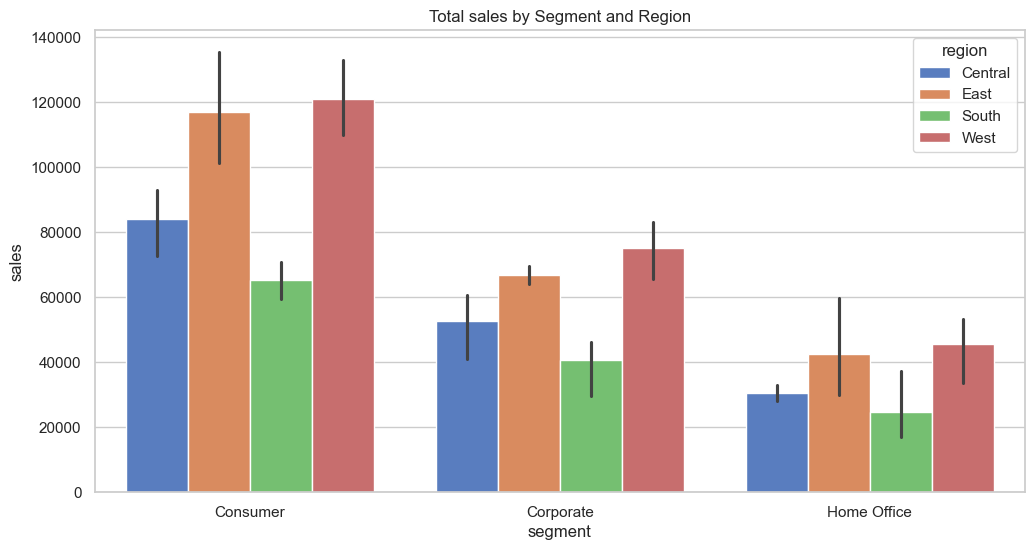

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(data=kpi_summary, x='segment', y='sales', hue='region')
plt.title('Total sales by Segment and Region')
plt.savefig('../images/Total sales by Segment and Region', dpi=100, bbox_inches='tight')
plt.show()

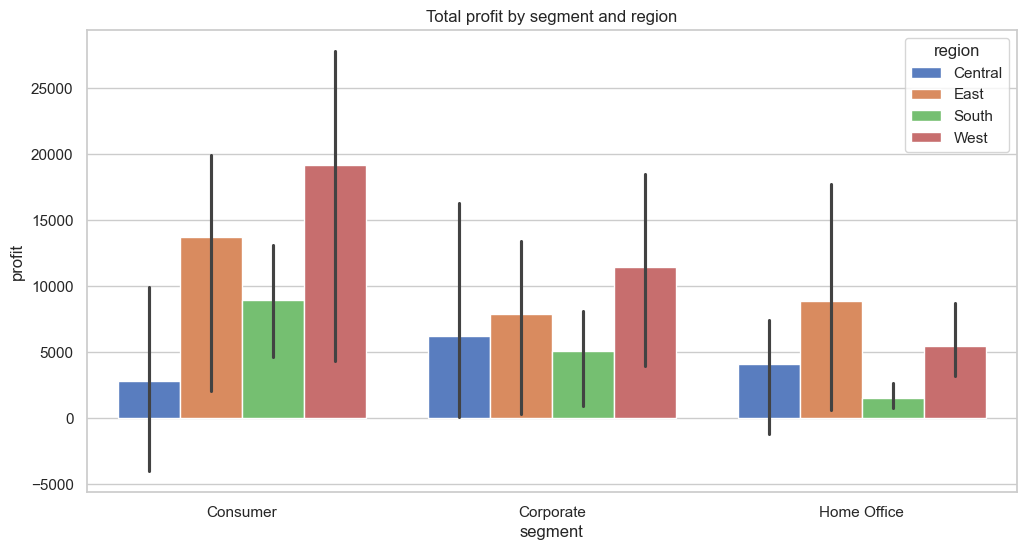

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(data=kpi_summary, x='segment', y='profit', hue='region')
plt.title('Total profit by segment and region')
plt.savefig('../images/Total profit by segment and region', dpi=100, bbox_inches='tight')
plt.show()

In [19]:
segment_margin = df.groupby('segment')[['sales', 'profit']].sum()
segment_margin['Profit Margin'] = (segment_margin['profit'] / segment_margin['sales']) * 100
segment_margin.reset_index()

,segment,sales,profit,Profit Margin
0,Consumer,1.161401e+06,134119.2092,11.548050
1,Corporate,7.061464e+05,91979.1340,13.025506
2,Home Office,4.296531e+05,60298.6785,14.034269


### 💡Insights - Profit Margin by Segment

* Consumer, drives most of the sales, especially in the West and East regions, however, it has the lowest profit margin with 11,5%, possibly due to higher discounts or lower pricing flexibility
* Home Office, has the highest profit margin with 14,03%, despite being also the lowest total sales. This could indicate a strong pricing strategy or lower operational costs.
* Corporate, follows with a 13% profit margin, showing good profitability relative to sales volume.

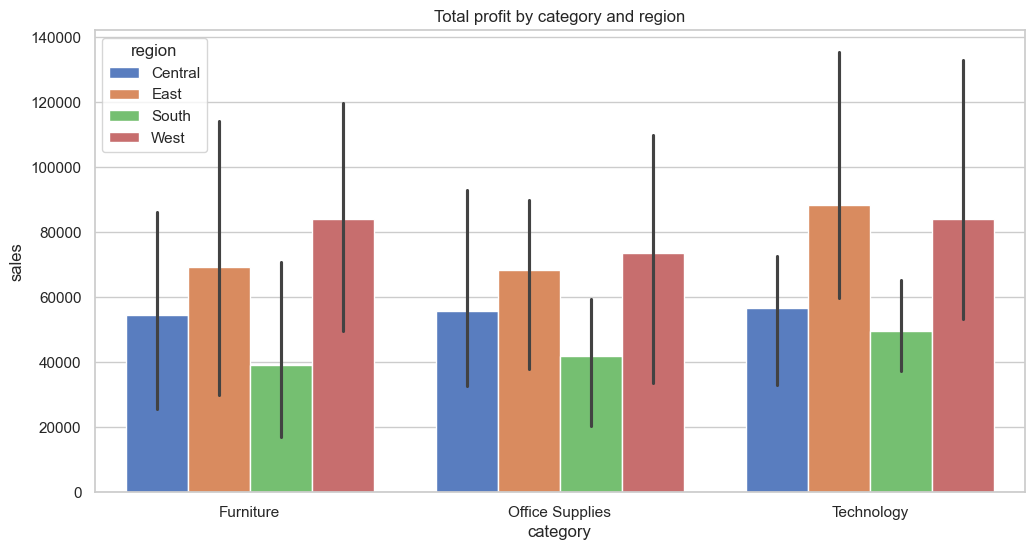

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=kpi_summary, x='category', y='sales', hue='region')
plt.title('Total profit by category and region')
plt.savefig('../images/Total profit by category and region', dpi=100, bbox_inches='tight')
plt.show()

In [21]:
cat_margin = df.groupby('category')[['sales', 'profit']].sum()
cat_margin['Profit Margin per Category'] = (cat_margin['profit'] / cat_margin['sales']) * 100
cat_margin.reset_index()

,category,sales,profit,Profit Margin per Category
0,Furniture,741999.7953,18451.2728,2.486695
1,Office Supplies,719047.0320,122490.8008,17.035158
2,Technology,836154.0330,145454.9481,17.395712


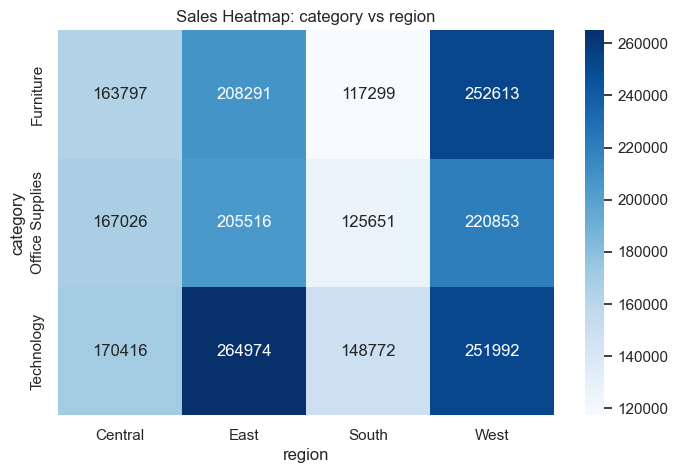

In [50]:
pivot_sales = df.pivot_table(values='sales', index='category', columns='region', aggfunc='sum')
pivot_profit = df.pivot_table(values='profit', index='category', columns='region', aggfunc='sum')

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_sales, annot=True, fmt='.0f', cmap='Blues')
plt.title('Sales Heatmap: category vs region')
plt.savefig('../images/Sales Heatmap category vs region.png', dpi=100, bbox_inches='tight')
plt.show()

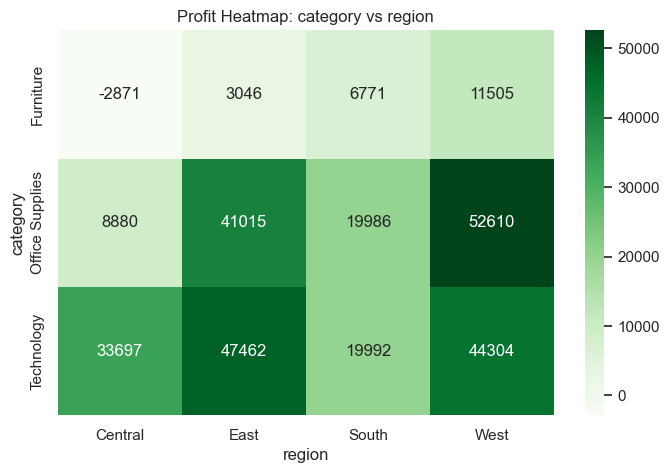

In [49]:
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_profit, annot=True, fmt='.0f', cmap='Greens')
plt.title('Profit Heatmap: category vs region')
plt.savefig('../images/Profit Heatmap category vs region.png', dpi=100, bbox_inches='tight')
plt.show()

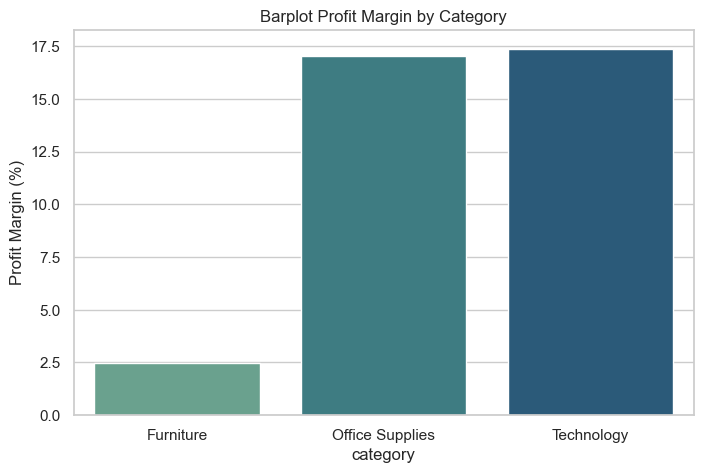

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(data=cat_margin, x='category', y='Profit Margin per Category', hue='category' ,palette='crest', legend=False)
plt.title('Barplot Profit Margin by Category')
plt.ylabel('Profit Margin (%)')
plt.savefig('../images/Barplot Profit Margin by Category', dpi=100, bbox_inches='tight')
plt.show()

### 💡 Insights - Sales and Profit Margin by Category

* Technology and Office Supplies are the most profitable categories overall.
* Furniture, has low margins and even loses in the central region.
* East and West regions generate the highest sales and profits.
* South Region underperforms across all categories
* Focus on East/West markets and review Furniture strategy in Central region.

## 🔍  Exploratory Analysis

In [25]:
monthly = df.groupby(['order_year', 'order_month_name'], sort=False)[['sales', 'profit']].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly['order_month_name'] = pd.Categorical(monthly['order_month_name'], categories=month_order, ordered=True)

monthly = monthly.sort_values(['order_year', 'order_month_name'])

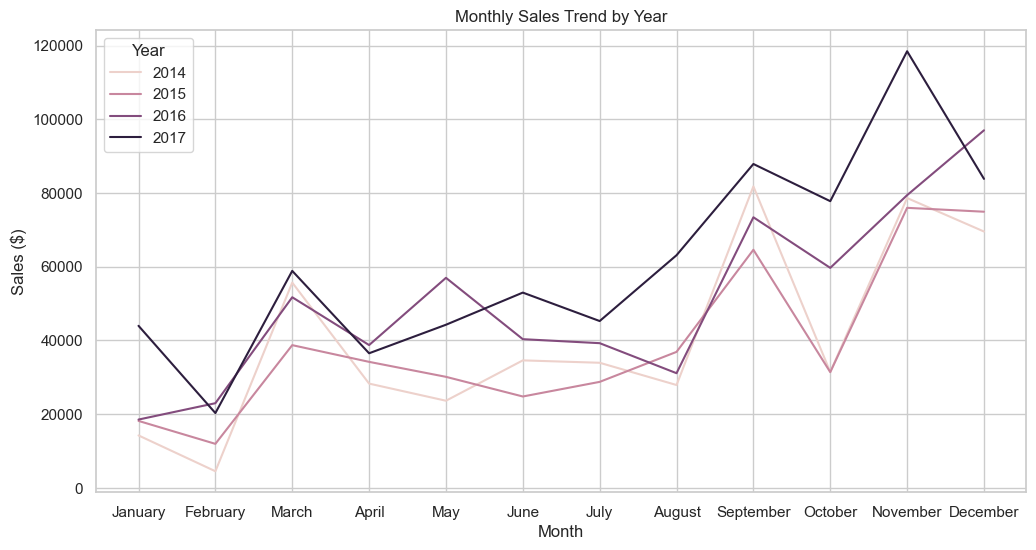

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_month_name', y='sales', data=monthly, hue='order_year', markers='o')
plt.title('Monthly Sales Trend by Year')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.legend(title='Year')
plt.savefig('../images/Monthly Sales Trend by Year', dpi=100, bbox_inches='tight')
plt.show()

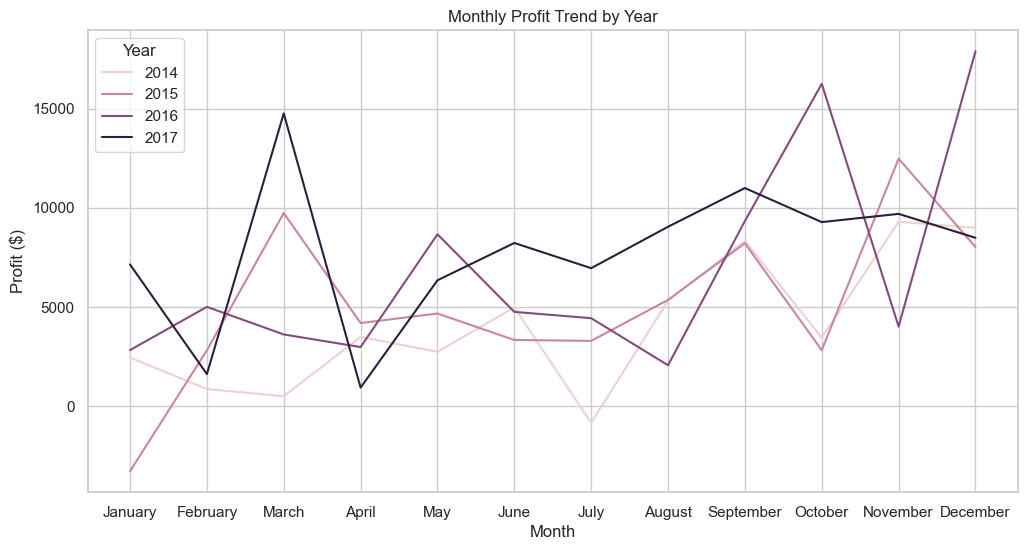

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_month_name', y='profit', data=monthly, hue='order_year', markers='o')
plt.title('Monthly Profit Trend by Year')
plt.xlabel('Month')
plt.ylabel('Profit ($)')
plt.legend(title='Year')
plt.savefig('../images/Monthly Profit Trend by Year', dpi=100, bbox_inches='tight')
plt.show()

### 💡 Insights - Sales and Profit Over Time

* Sales and profits show a seasonal pattern, with clear peaks toward November and December, indicating strong holiday demand.
* Year over year we can see steady increase in sales and profit, indicating business growth.
* January and february show the lowest sales, suggesting a post-holiday slowdown.
* Between May and September remain steady with moderate fluctuations.
* A noticeable downturn occurs in April every year, this could indicate reduced business activity or seasonally lower demand. 

## Correlation and Relationships

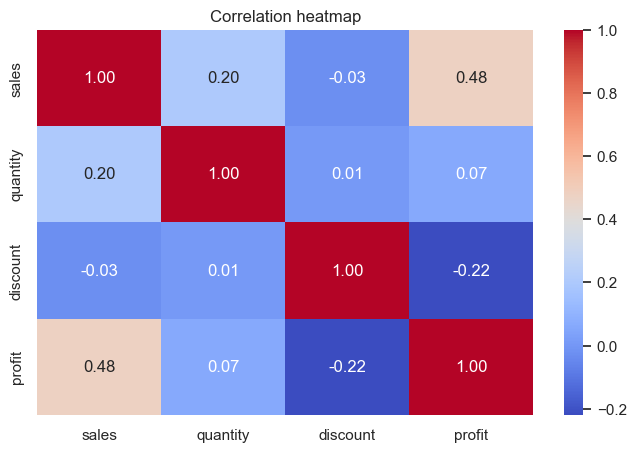

In [44]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['sales', 'quantity', 'discount', 'profit']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heatmap')
plt.savefig('../images/Correlation heatmap.png', dpi=100, bbox_inches='tight')
plt.show()

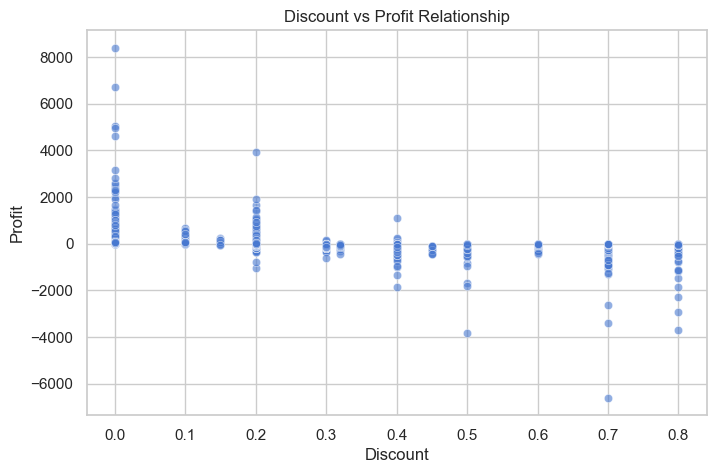

In [42]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='discount', y='profit', data=df, alpha=0.6)
plt.title('Discount vs Profit Relationship')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.savefig('../images/Discount vs Profit Relationship', dpi=100, bbox_inches='tight')
plt.show()

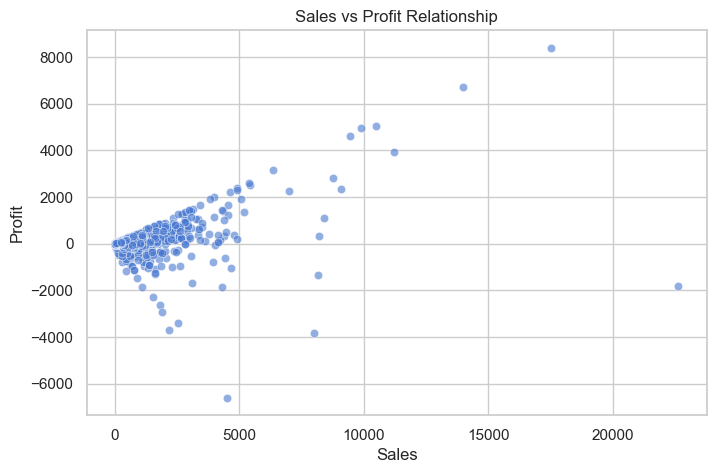

In [43]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sales', y='profit', data=df, alpha=0.6)
plt.title('Sales vs Profit Relationship')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.savefig('../images/Sales vs Profit Relationship', dpi=100, bbox_inches='tight')
plt.show()

### 💡 Insights - Correlation and Relationships

* Sales and profit show a moderate positiva correlation 0.48.
* Discount and profit have a strong negative correlation -0.22, could mean that excessive discounts drastically redure profitability.
* Quantity has a weak correlation with both sales and profit, meaning selling more units does not always mean more profit.
* Maintaining moderate discounts can significally improve margins.

## Conclusions

* The Home Office segment is the most profitable overall.
* Technology leads in both sales and profit among product categories.
* The West region shows the highest performance in sales and profit.
* The Central region has the weakest results.
* Sales exhibit strong seasonality, peaking in November and December and dipping in April.
* Profitability improved steadily from 2014 to 2017, indicating consistent business growth.

## Recommendations

* Reduce discount levels, especially in Furniture and Consumer segments.
* Investigate low performance in Central region and April downturn for operational improvements.